In [143]:
import utils
import re
from collections import defaultdict
from itertools import permutations, combinations

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Day 13: Knights of the Dinner Table

We have a list of people and their happiness levels depending on who they are sitting next to. We need to sit everyone at a circular table (so everyone has two neighbours) in such a way to maximise happiness.

For the test setting, the optimal +happiness is 330. Whats the max +happiness for the actual guest list?

In [161]:
test = """
Alice would gain 54 happiness units by sitting next to Bob.
Alice would lose 79 happiness units by sitting next to Carol.
Alice would lose 2 happiness units by sitting next to David.
Bob would gain 83 happiness units by sitting next to Alice.
Bob would lose 7 happiness units by sitting next to Carol.
Bob would lose 63 happiness units by sitting next to David.
Carol would lose 62 happiness units by sitting next to Alice.
Carol would gain 60 happiness units by sitting next to Bob.
Carol would gain 55 happiness units by sitting next to David.
David would gain 46 happiness units by sitting next to Alice.
David would lose 7 happiness units by sitting next to Bob.
David would gain 41 happiness units by sitting next to Carol.""".strip().splitlines()

So first up, we need a way to parse the text input into some kind of data structure which makes it easy to look up the happiness cost:

In [195]:
def parse_input(data=test, costs={}, all_names=set()):
    for line in data:
        cost = int(re.search(r"-?\d+", line).group())
        if "lose" in line:
            cost = -1 * int(cost)
        
        names = re.findall('([A-Z][a-z]+)', line)
        costs[(names[0], names[-1])] = int(cost)
        all_names.add(names[0])
        all_names.add(names[1])
    return costs, all_names
        
costs, names = parse_input()
costs, names

({('Alice', 'Bob'): 54,
  ('Alice', 'Carol'): -79,
  ('Alice', 'David'): -2,
  ('Bob', 'Alice'): 83,
  ('Bob', 'Carol'): -7,
  ('Bob', 'David'): -63,
  ('Carol', 'Alice'): -62,
  ('Carol', 'Bob'): 60,
  ('Carol', 'David'): 55,
  ('David', 'Alice'): 46,
  ('David', 'Bob'): -7,
  ('David', 'Carol'): 41},
 {'Alice', 'Bob', 'Carol', 'David'})

Now to calcuate the seating happiness number:

In [196]:
def calculuate_happiness(order):
    happy = 0
    length = len(order)
    
    for i, name in enumerate(order):
        happy += costs[(name, order[(i+1) % length])]

    order = order[::-1]  # now going through the list backwards
    for i, name in enumerate(order):
        happy += costs[(name, order[(i+1) % length])]
    
    return happy

calculuate_happiness(["Alice", "Bob", "Carol"])

49

Lets find the max happiness number:

Seating happiness distribution for all permutations
('David', 'Carol', 'Bob', 'Alice')


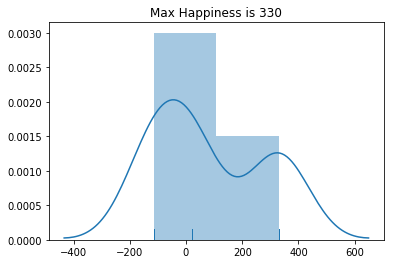

In [198]:
def seating_happiness(costs=costs, names=names):
    seating_happy = []
    
    seating_permutations = list(permutations(names))
    
    for n in seating_permutations:
        seating_happy.append(calculuate_happiness(n))
    
    seating_positions = seating_permutations[seating_happy.index(max(seating_happy))]
    print(f"Seating happiness distribution for all permutations")
    print(seating_positions)
    
    sns.distplot(seating_happy, rug=True)
    plt.title(f"Max Happiness is {max(seating_happy)}")
    plt.show()
    
    return #, seating_happy

seating = seating_happiness()

Moving on to the actual input:

Seating happiness distribution for all permutations
('Frank', 'David', 'George', 'Alice', 'Bob', 'Mallory', 'Eric', 'Carol')


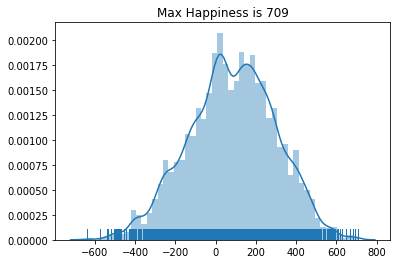

In [199]:
costs, names = parse_input(data)
seating_happiness(costs, names)

# --- Part Two ---

In all the commotion, you realize that you forgot to seat yourself. At this point, you're pretty apathetic toward the whole thing, and your happiness wouldn't really go up or down regardless of who you sit next to. You assume everyone else would be just as ambivalent about sitting next to you, too.

So, add yourself to the list, and give all happiness relationships that involve you a score of 0.

What is the total change in happiness for the optimal seating arrangement that actually includes yourself?

---

So how do we add ourselves? To every single position in every single seating arrangement and then calculate happiness? 

First up, I'm going to add myself to the names and the costs:

In [202]:
for name in names:
    costs[("me", name)] = 0
    costs[(name, "me")] = 0

names.add("me")
names

{'Alice', 'Bob', 'Carol', 'David', 'Eric', 'Frank', 'George', 'Mallory', 'me'}

Seating happiness distribution for all permutations
('Frank', 'Carol', 'Eric', 'Mallory', 'Bob', 'Alice', 'George', 'David', 'me')


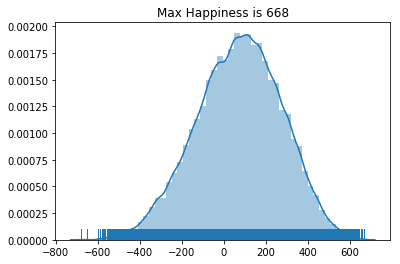

In [205]:
seating_happiness(costs, names)

`668` is the right answer!